<a href="https://colab.research.google.com/github/Icon826/plot_plate_boundary_pygmt/blob/main/pygmt_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### PyGMT 0.17 no Google Colab

> ⚠️ **Nota:** Há uma incompatibilidade temporária no sistema de resolução do conda/mamba no Colab (a versão do Python em uso é **3.12.11**, mas o solver pode conter um *pin* interno diferente).  
> Por isso, para instalar o PyGMT é necessário usar uma versão compatível do **condacolab** (ou ajustar o arquivo `pinned` do conda para **python=3.12**).  
> Depois disso, o **PyGMT 0.17** instala e executa normalmente. Isso será corrigido em uma atualização futura do Colab.


In [1]:
!pip install condacolab --quiet
# need to install condacolab for a python 3.11 pin
import condacolab
condacolab.install_from_url("https://github.com/conda-forge/miniforge/releases/download/25.3.1-0/Miniforge3-Linux-x86_64.sh")

✨🍰✨ Everything looks OK!


**Don't PANIC !** The kernel will restart automatically.

After that, install `pygmt` normally.

In [2]:
!mamba install pygmt --quiet # <--- it takes around 1 minute

In [8]:
!mamba install obspy --quiet

warning  libmamba [fonttools-4.60.1-py312h8a5da7c_0] The following files were already present in the environment:
    - bin/fonttools
    - bin/pyftmerge
    - bin/pyftsubset
    - bin/ttx
    - share/man/man1/ttx.1


In [3]:
import pygmt
pygmt.show_versions()

PyGMT information:
  version: v0.17.0
System information:
  python: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
  executable: /usr/bin/python3.real
  machine: Linux-6.6.105+-x86_64-with-glibc2.35
Dependency information:
  numpy: 2.3.5
  pandas: 2.3.3
  xarray: 2025.11.0
  packaging: 25.0
  contextily: None
  geopandas: 1.1.1
  IPython: 7.34.0
  pyarrow: 18.1.0
  rioxarray: None
  gdal: 3.11.0
  ghostscript: 10.06.0
GMT library information:
  version: 6.5.0
  padding: 2
  share dir: /usr/local/share/gmt
  plugin dir: /usr/local/lib/gmt/plugins
  library path: /usr/local/lib/libgmt.so
  cores: 2
  grid layout: rows
  image layout: 
  binary version: 6.5.0


gmtread [NOTICE]: Remote data courtesy of GMT data server oceania [http://oceania.generic-mapping-tools.org]
gmtread [NOTICE]: SRTM15 Earth Relief v2.7 at 1x1 arc degrees reduced by Gaussian Cartesian filtering (314.5 km fullwidth) [Tozer et al., 2019].
gmtread [NOTICE]:   -> Download grid file [111K]: earth_relief_01d_p.grd


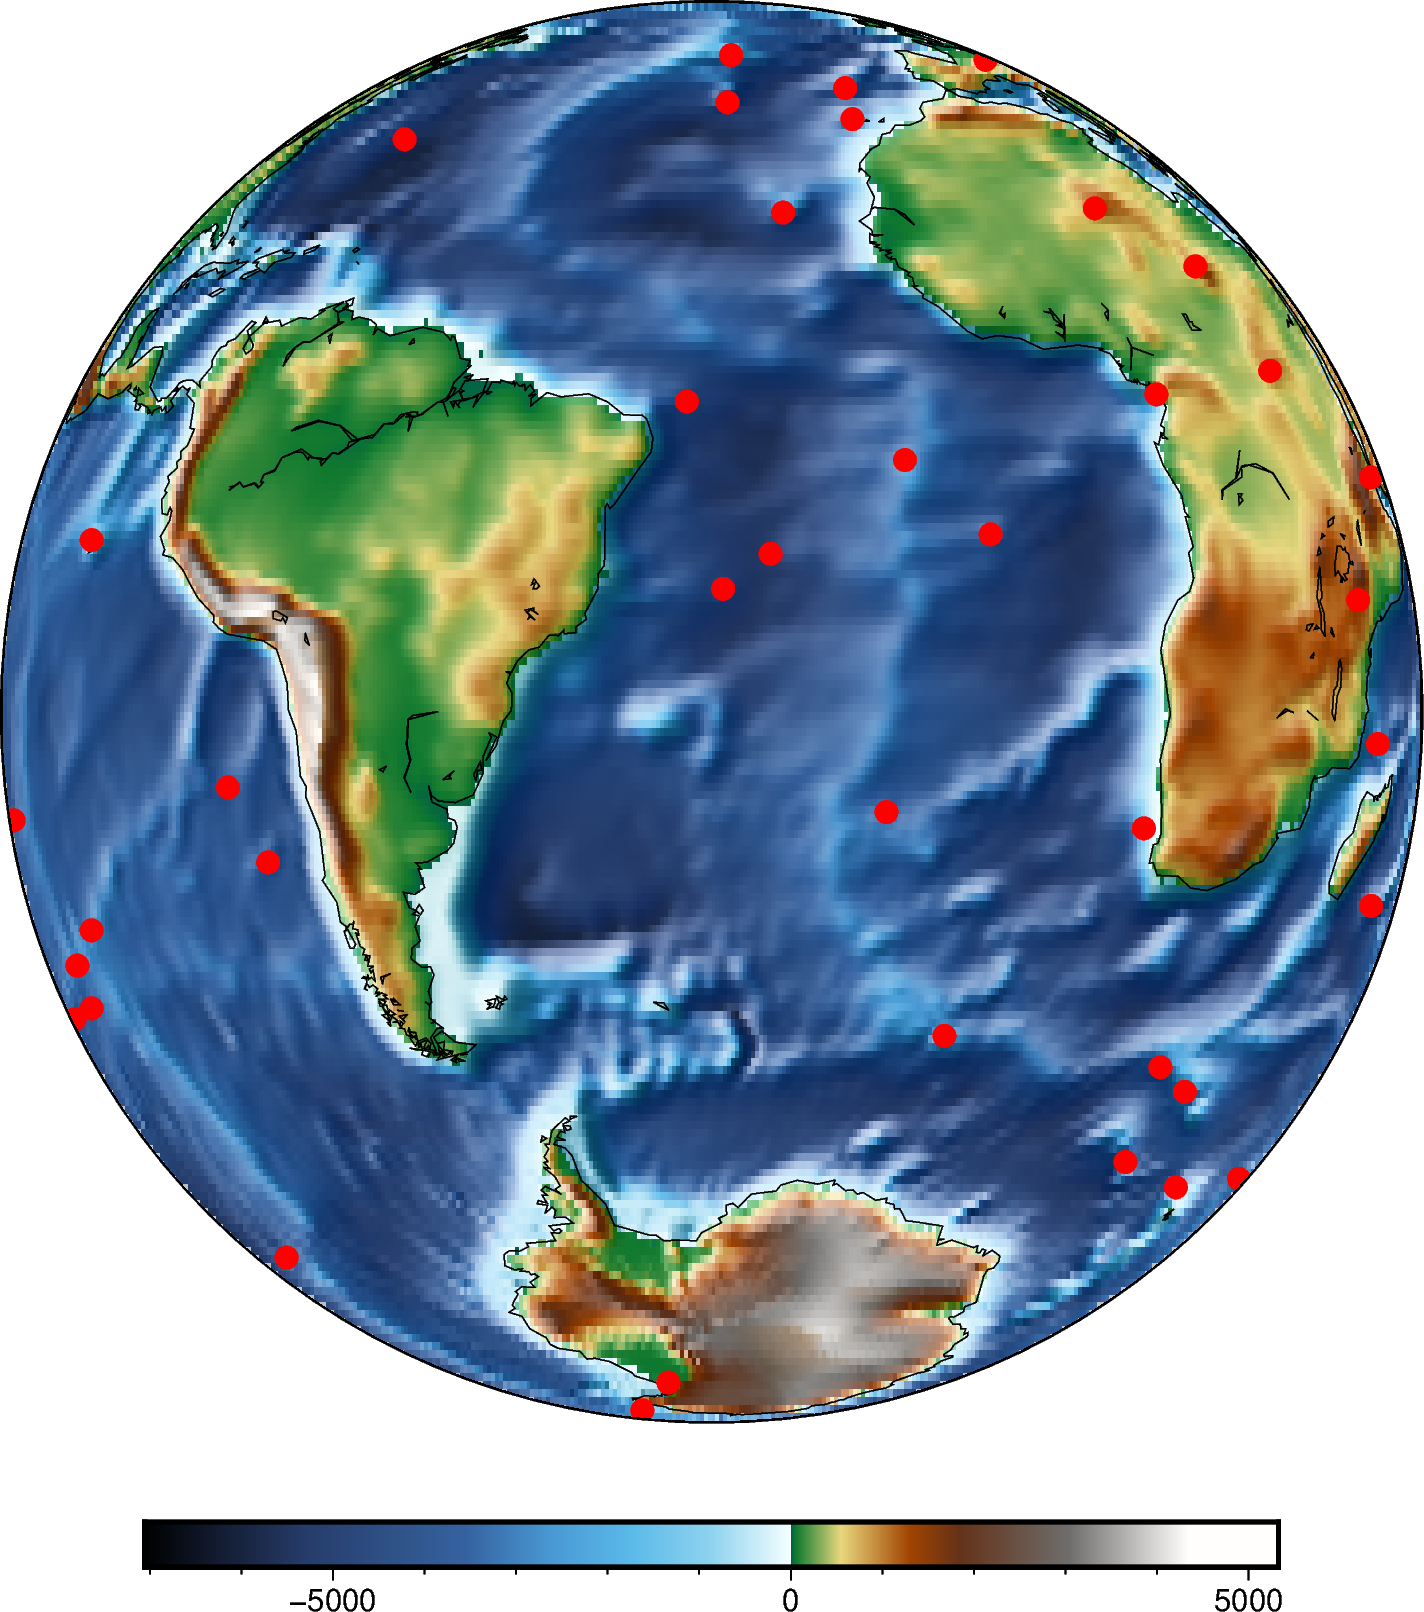

In [4]:
# Just an example
from pygmt.datasets import load_earth_relief #<-- Use global relief for topography

grid = load_earth_relief(resolution='01d', registration='pixel')

fig = pygmt.Figure()
fig.basemap(region='g', projection='G330/-30/12c', frame=True)
fig.grdimage(grid, cmap='geo', shading=True)
fig.coast(resolution='c', shorelines=True, area_thresh=1000)
fig.plot(data='@hotspots.txt', style='c0.2c', fill='red')
fig.colorbar()
fig.show()

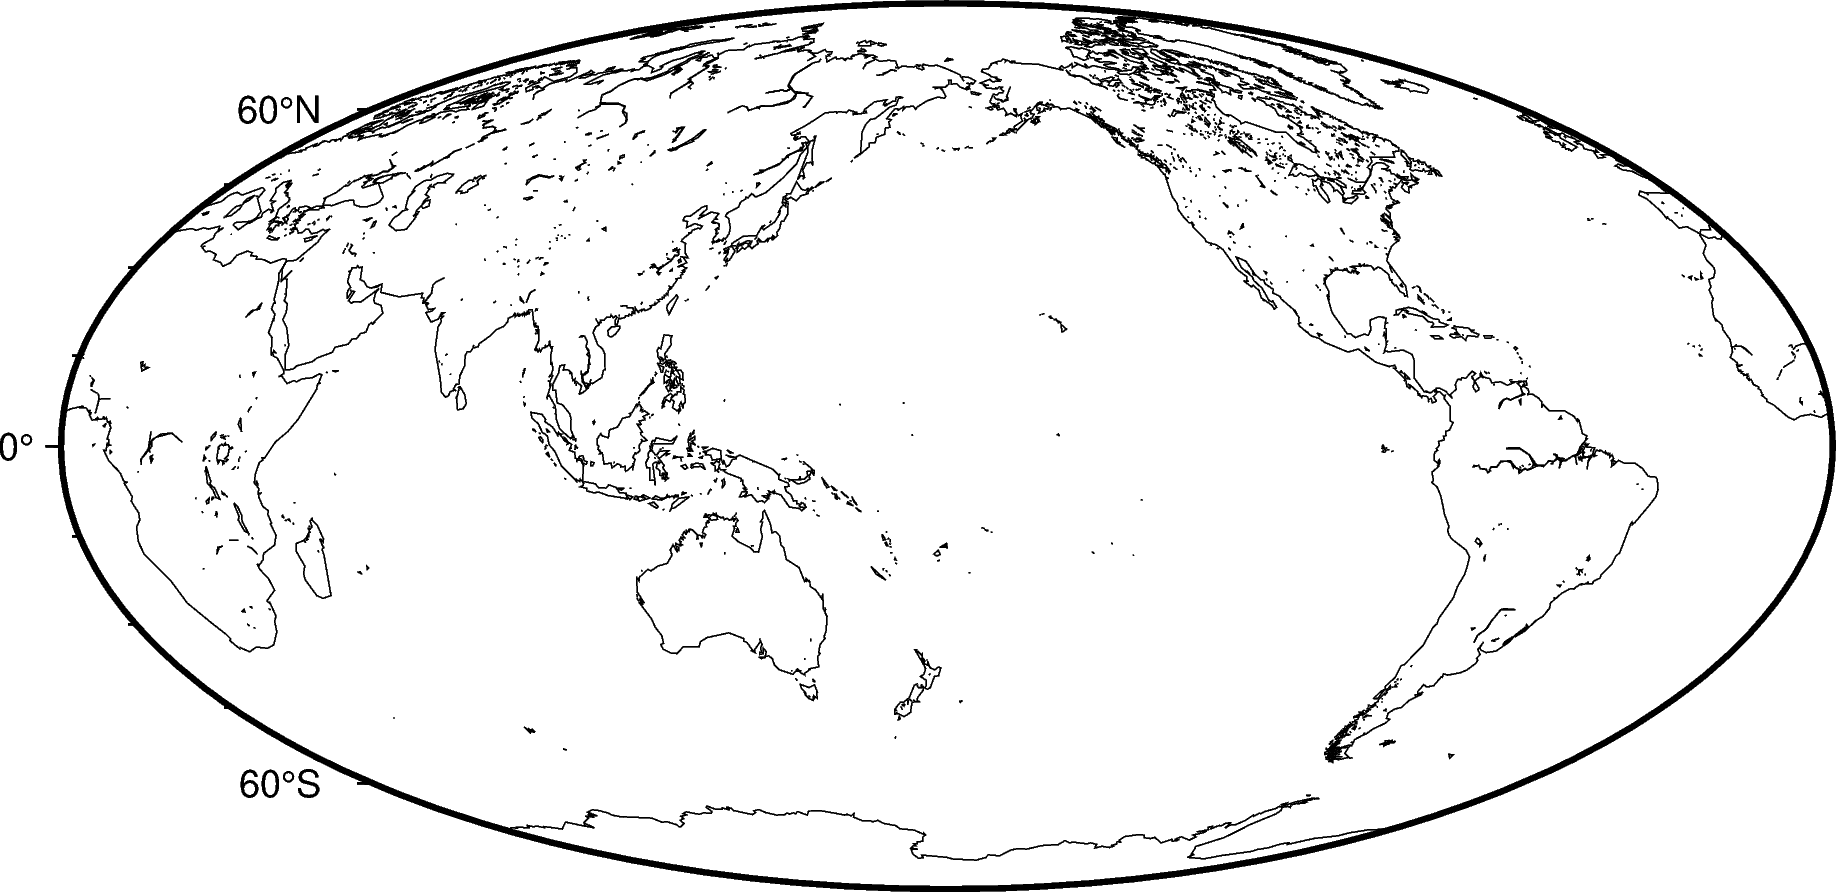

In [5]:
fig = pygmt.Figure()
fig.basemap(region="g", projection="W15c", frame=True)
fig.coast(shorelines=True)
fig.show()

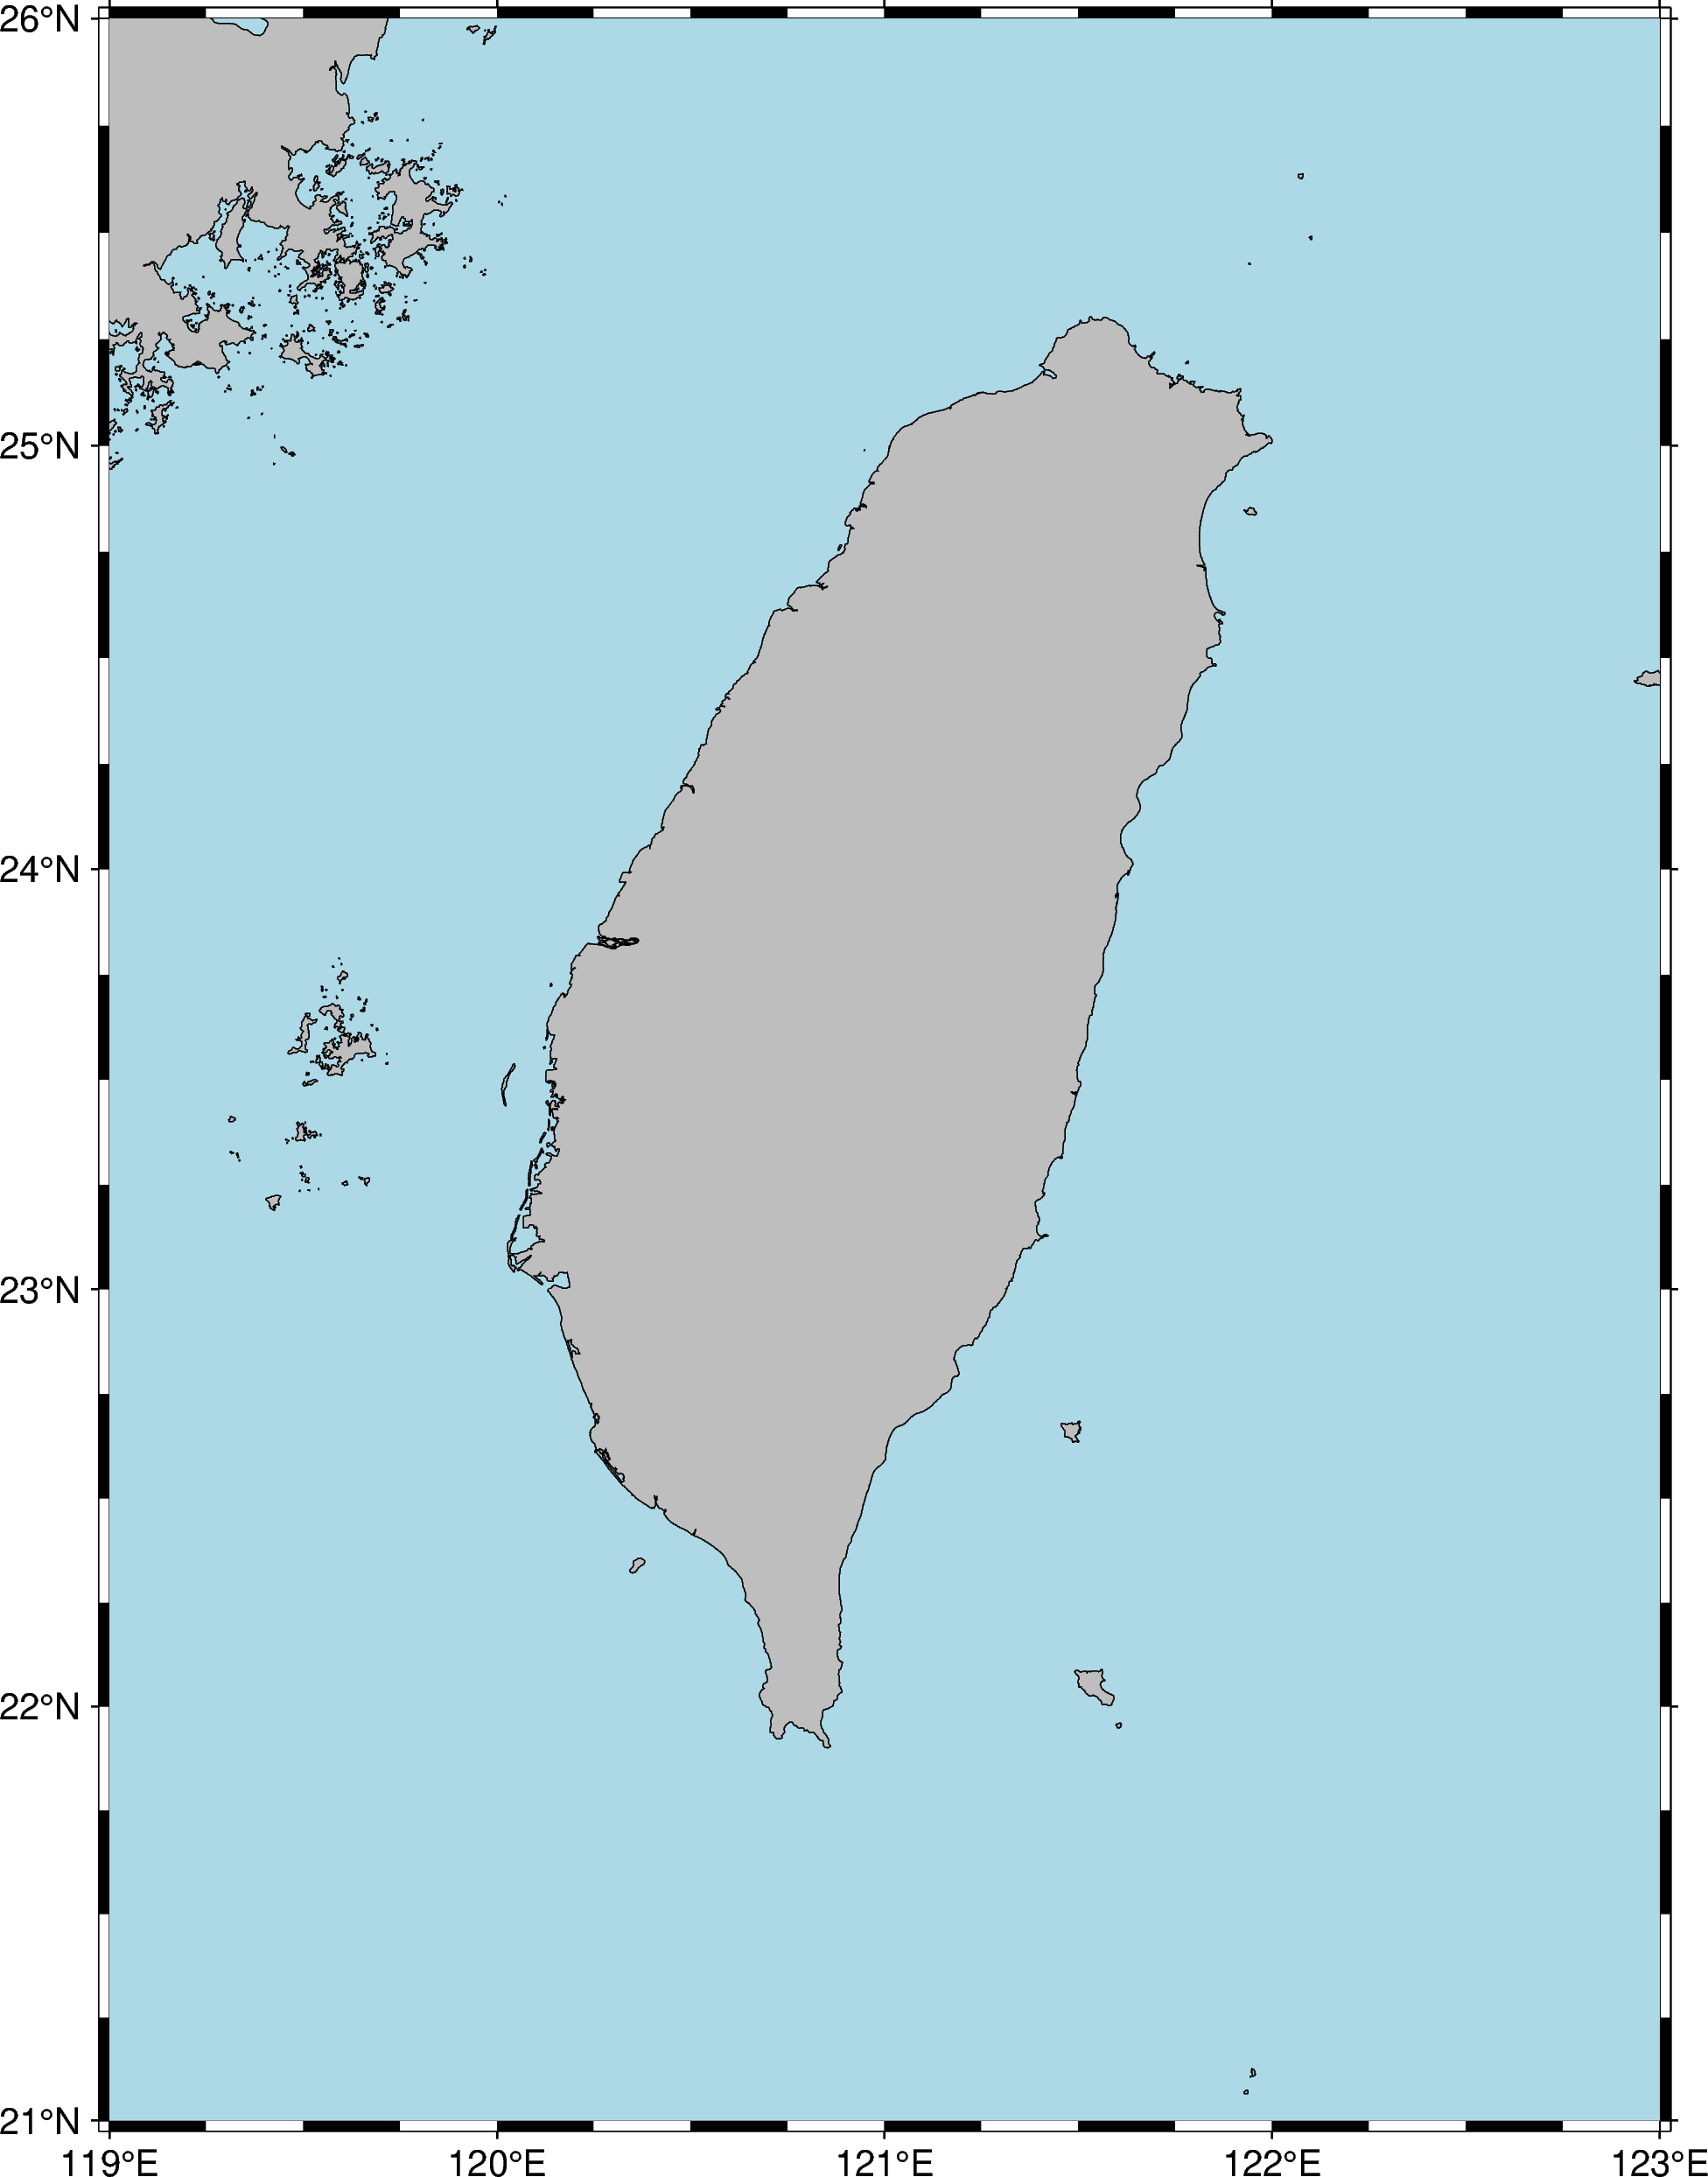

In [6]:
fig = pygmt.Figure()
fig.basemap(region="119/123/21/26", projection="M15c", frame=True)
fig.coast(shorelines=True, land="gray", water="lightblue")
fig.show()

grdblend [NOTICE]: Remote data courtesy of GMT data server oceania [http://oceania.generic-mapping-tools.org]
grdblend [NOTICE]: Earth Relief at 3x3 arc seconds tiles provided by SRTMGL3 (land only) [NASA/USGS].
grdblend [NOTICE]:   -> Download 1x1 degree grid tile (earth_relief_03s_g): N21E120


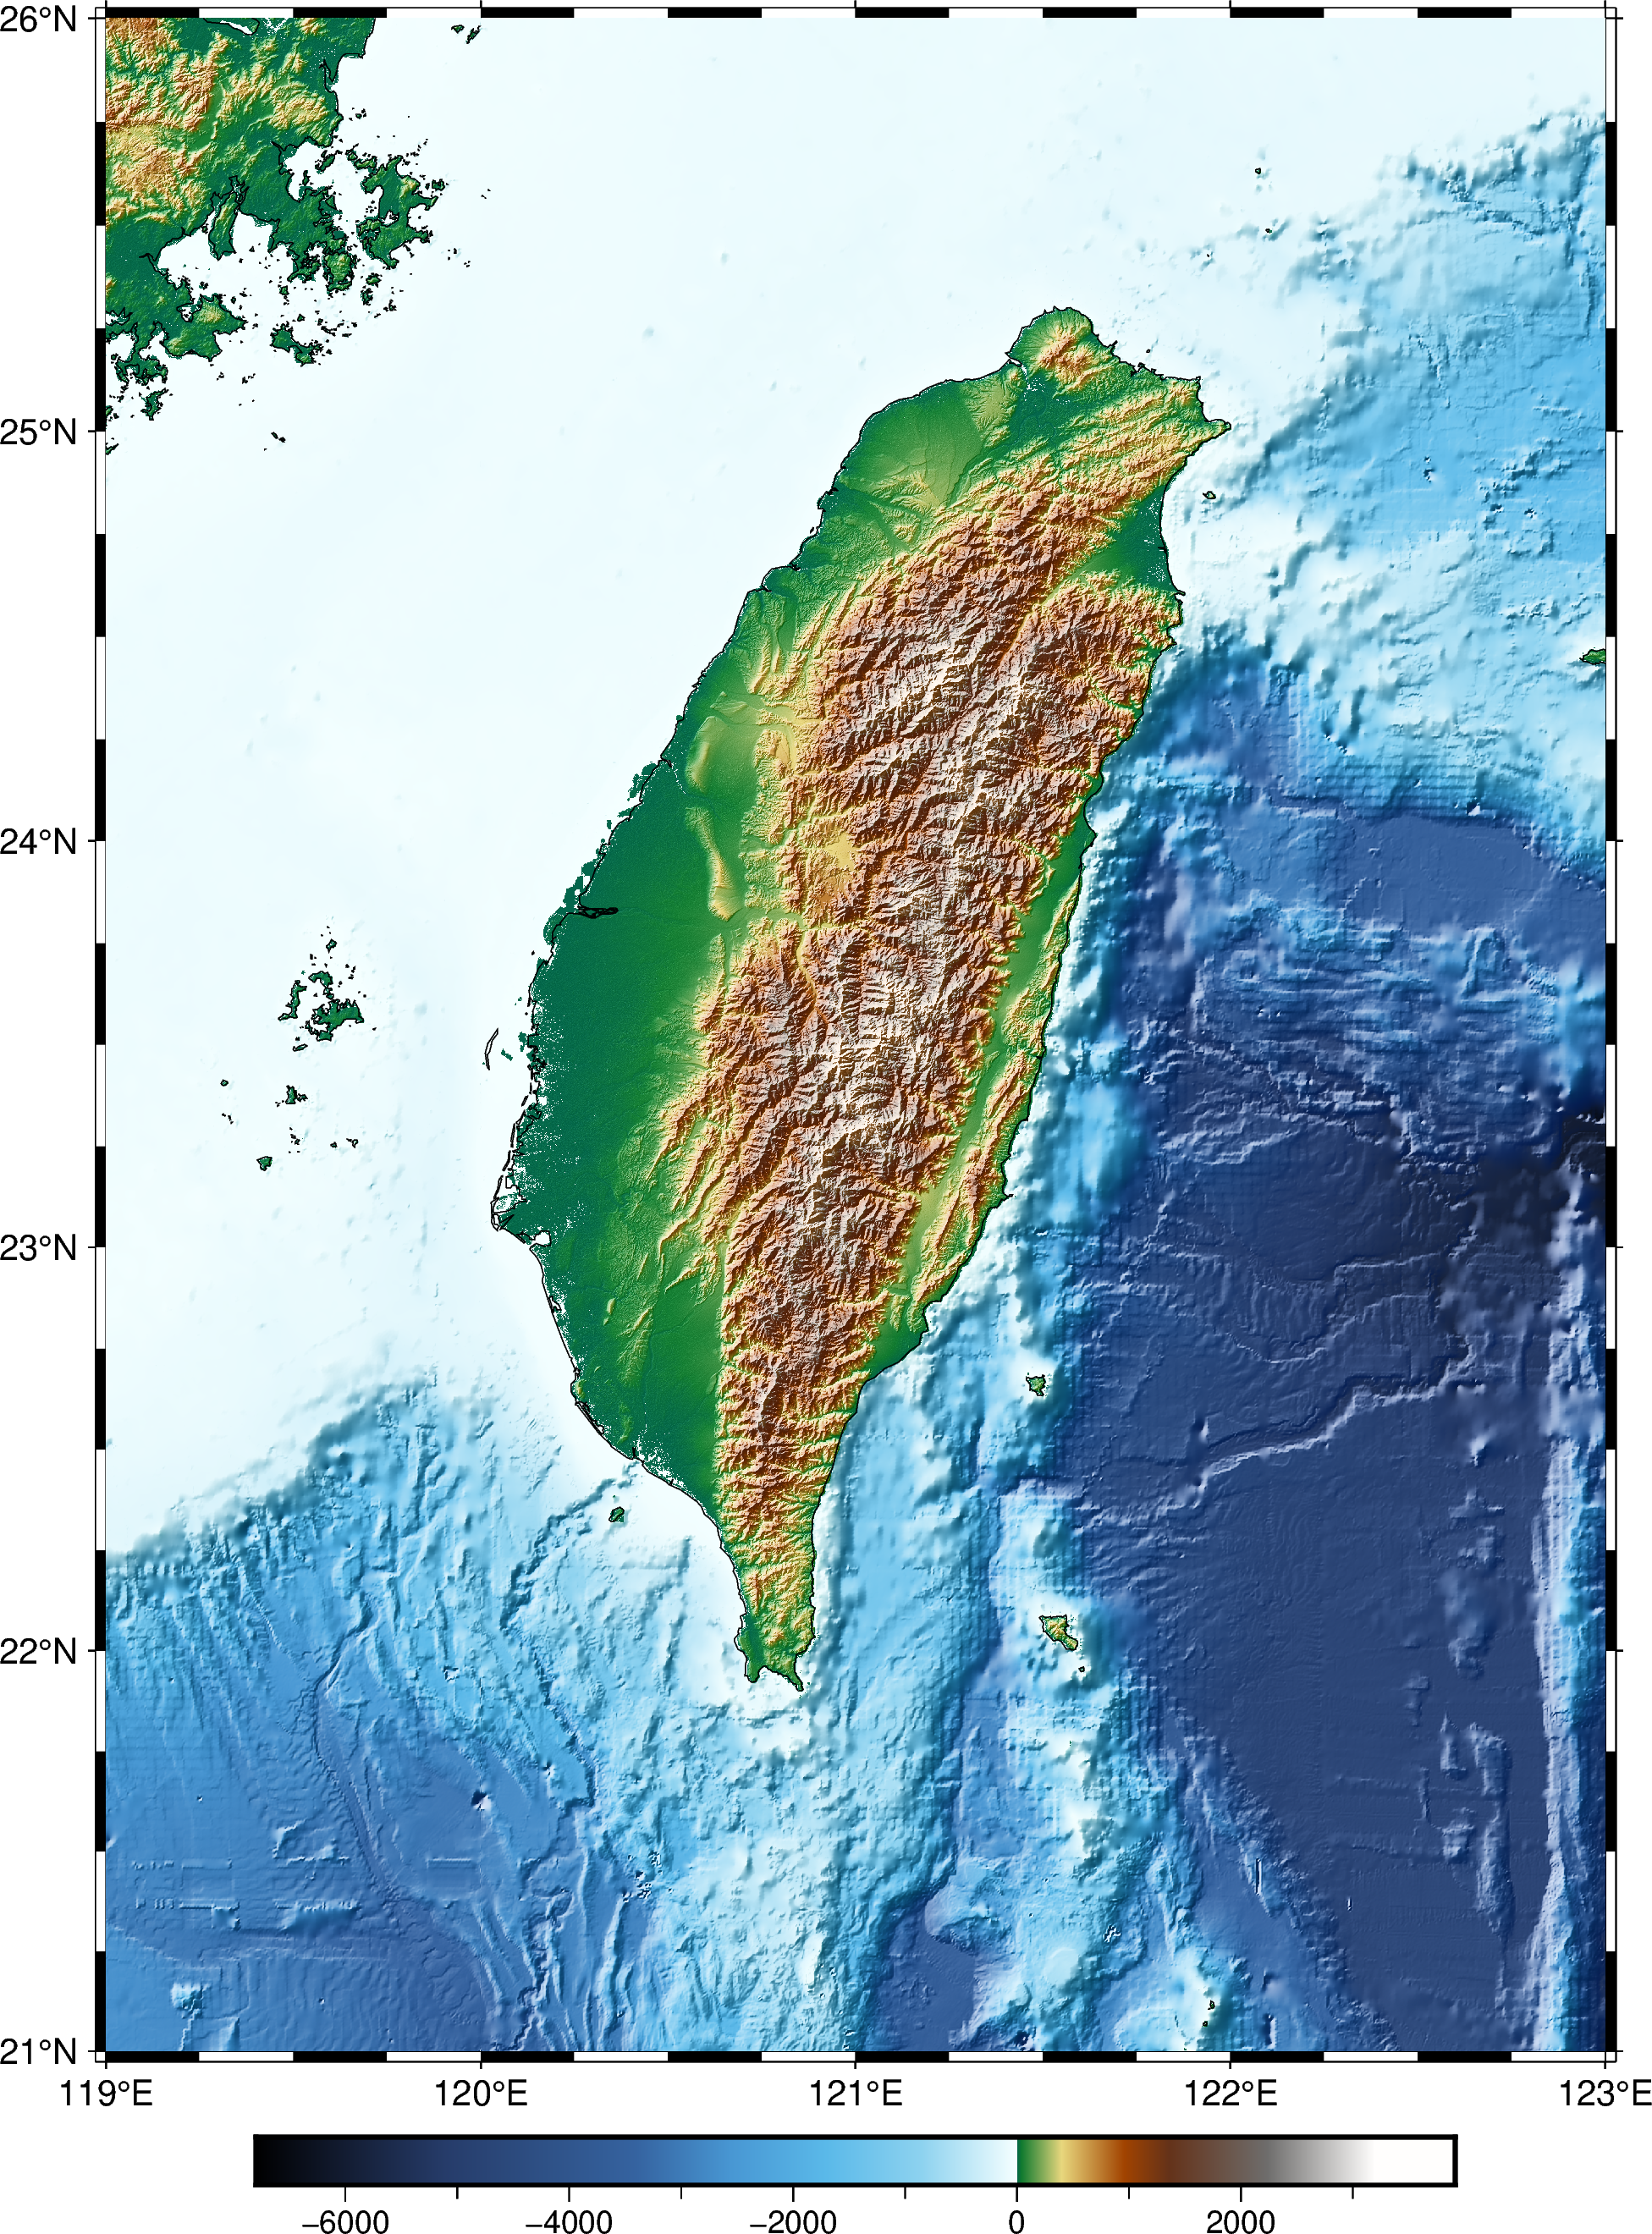

In [7]:
from pygmt.datasets import load_earth_relief #<-- Use global relief for topography

# Load very high-resolution earth relief data for the specified region of Taiwan
grid = load_earth_relief(resolution='03s', region='119/123/21/26', registration='gridline') # Changed registration to 'gridline'

fig = pygmt.Figure()
# Set basemap region to Taiwan's coordinates with a Mercator projection
fig.basemap(region='119/123/21/26', projection='M15c', frame=True)
fig.grdimage(grid, cmap='geo', shading=True)
# Plot coastlines with high resolution
fig.coast(resolution='h', shorelines=True)
fig.colorbar()
fig.show()

Scotia 區域火山數量：72


plot [WARNING]: Cannot use auto-legend -l for variable symbol size unless +S<size> is used. Option -l ignored.
plot [WARNING]: Cannot use auto-legend -l for variable symbol size unless +S<size> is used. Option -l ignored.


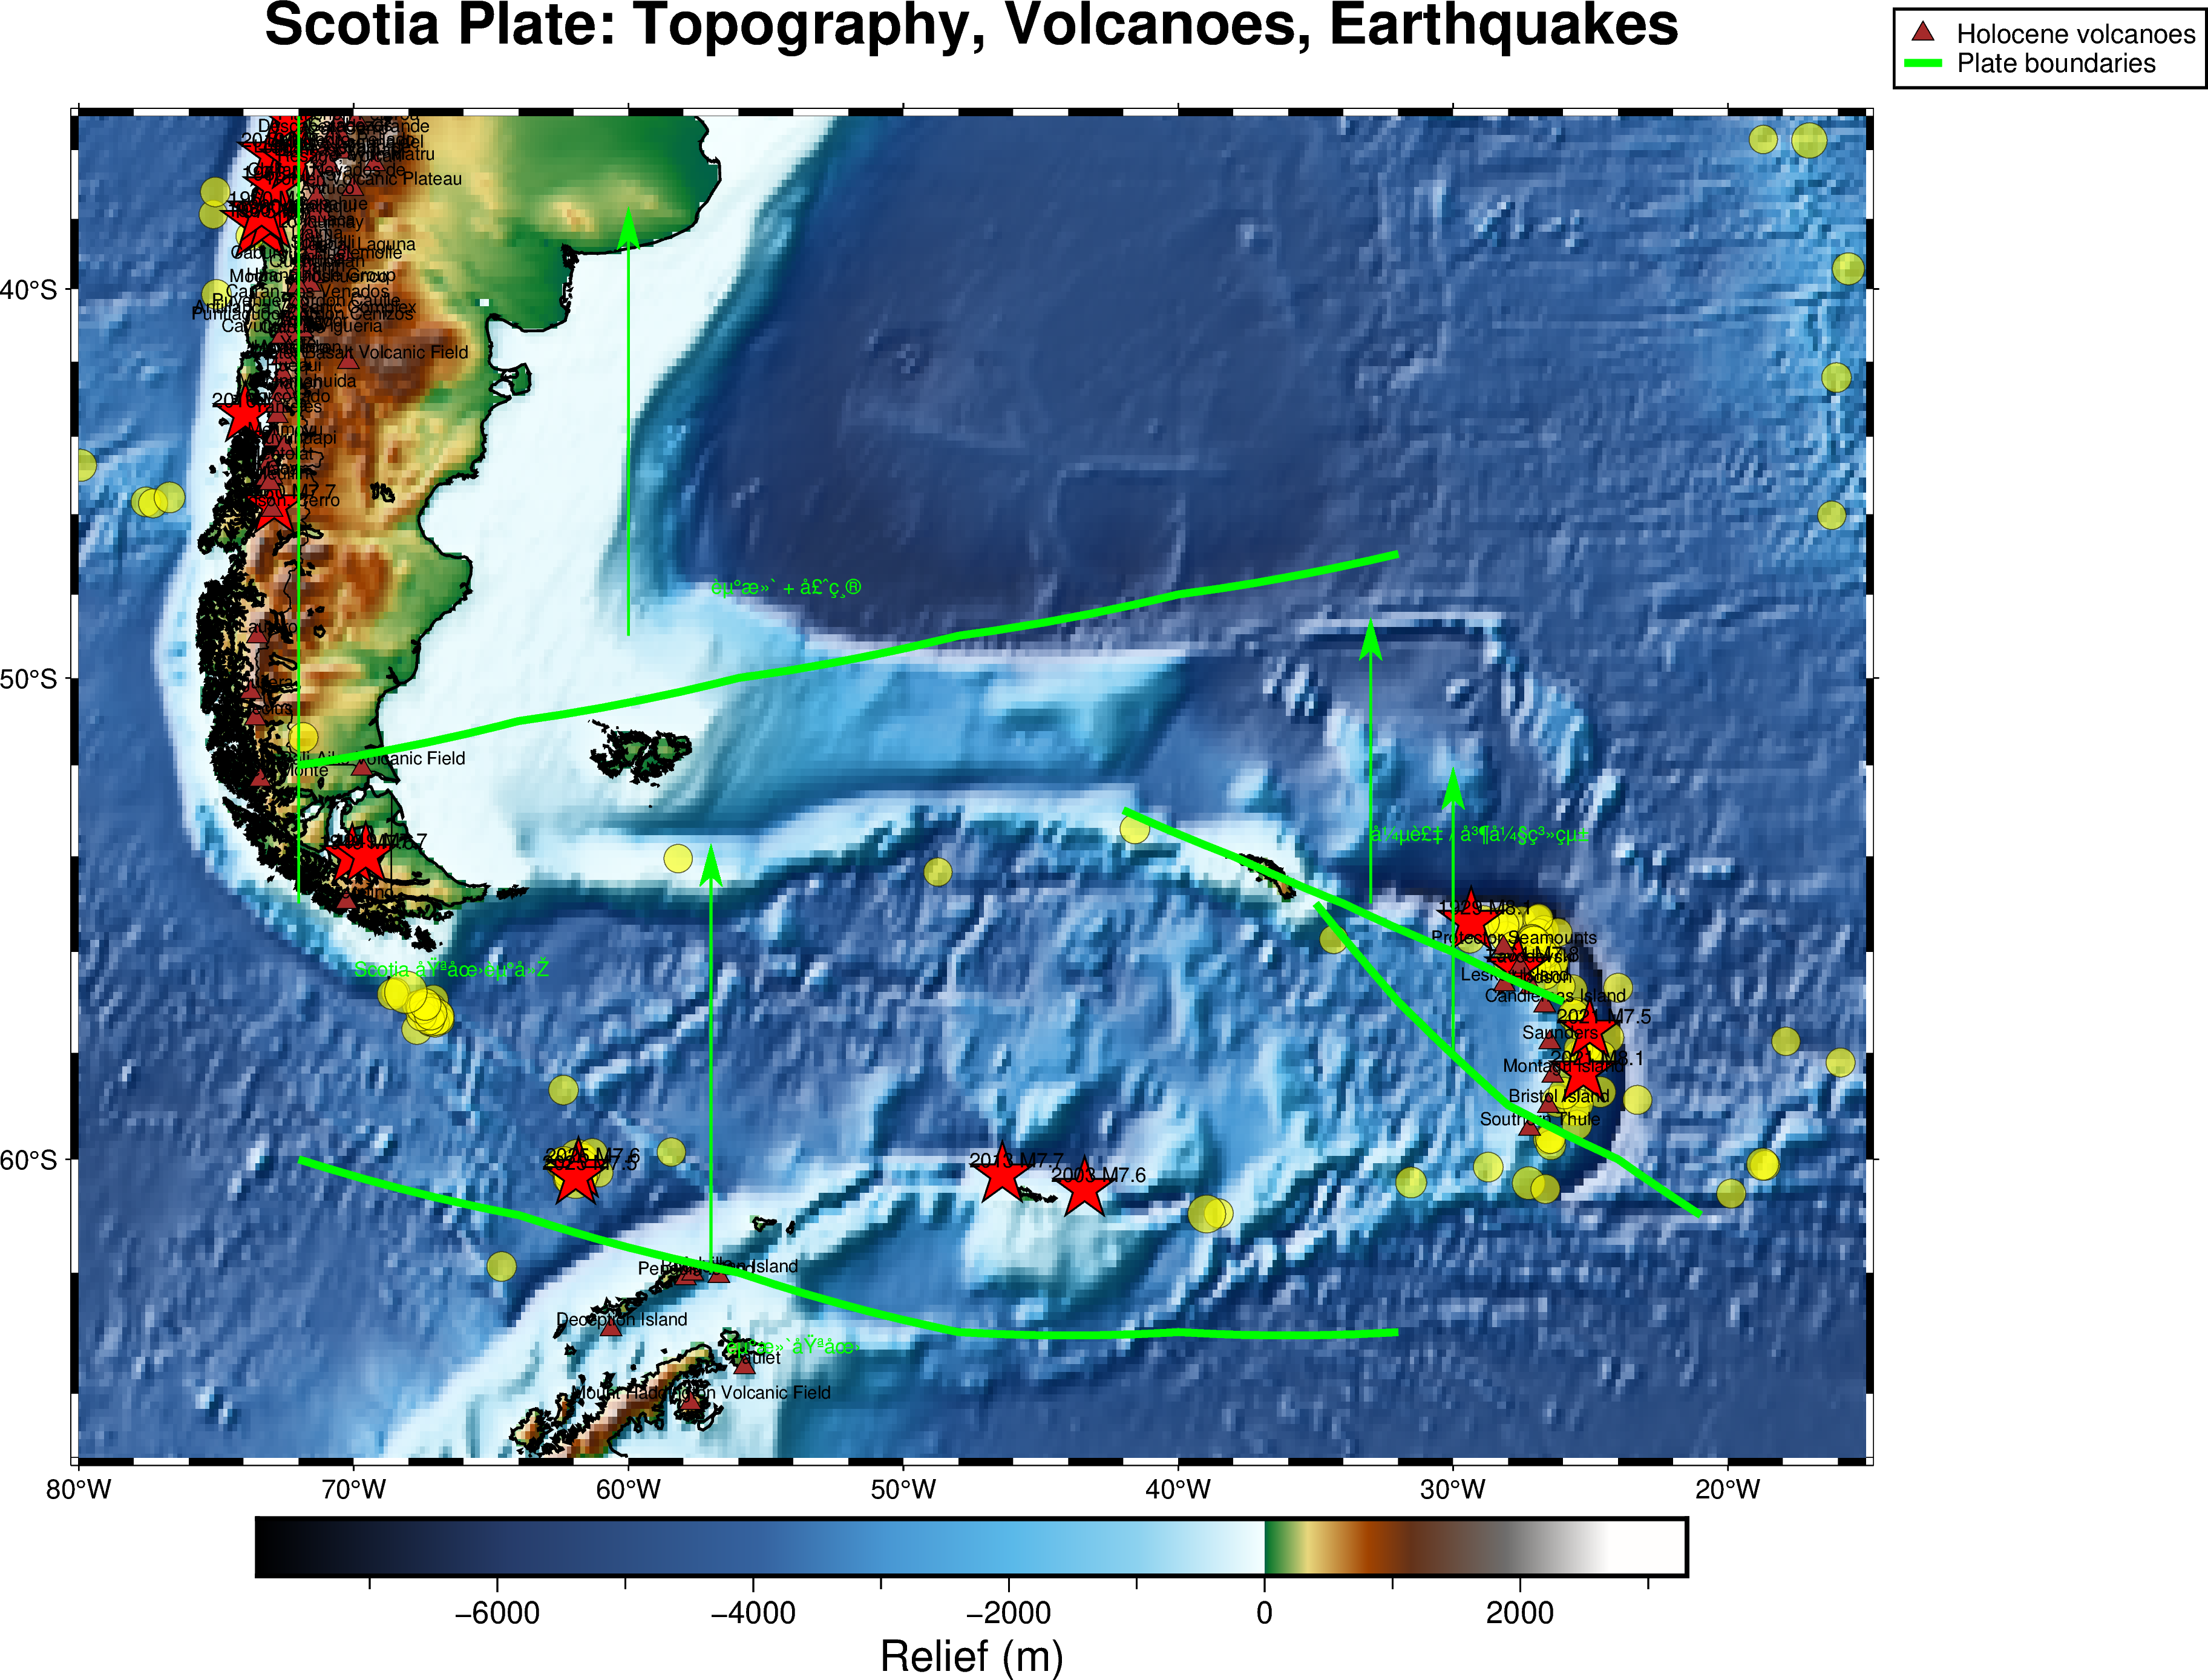

已輸出圖檔：scotia_plate_topo_volcano_quake_green_boundaries.png


In [18]:
import pygmt
import pandas as pd
from pygmt.datasets import load_earth_relief

# ============================================
# 0. 基本設定：Scotia 區域範圍 & 地形資料
# ============================================

# Scotia Plate 大致範圍（可依需要微調）
region = [-80, -15, -65, -35]  # [lon_min, lon_max, lat_min, lat_max]

# 讀取全球地形/海深資料
grid = load_earth_relief(
    resolution="10m",
    region=region,
    registration="gridline"
)

# ============================================
# 1. 讀取火山資料：從「全球火山清單」中篩出 Scotia 區域
#    檔案：火山.csv（GVP 匯出的 Holocene 清單）
# ============================================

volc_raw = pd.read_csv("火山.csv")

# GVP 匯出：第一列為欄名（Volcano Number, Volcano Name ...）
if "Volcano Number" in volc_raw.iloc[0].astype(str).tolist():
    header = volc_raw.iloc[0]
    volc = volc_raw.iloc[1:].copy()
    volc.columns = header
else:
    volc = volc_raw

# 轉為數字
volc["Latitude"] = pd.to_numeric(volc["Latitude"], errors="coerce")
volc["Longitude"] = pd.to_numeric(volc["Longitude"], errors="coerce")

# Scotia 區域篩選
lat_min, lat_max = -65, -35
lon_min, lon_max = -80, -15

scotia_volc = volc[
    (volc["Latitude"] >= lat_min) & (volc["Latitude"] <= lat_max) &
    (volc["Longitude"] >= lon_min) & (volc["Longitude"] <= lon_max)
].copy()

# 精簡成 PyGMT 要用的欄位
scotia_volc = scotia_volc[["Volcano Name", "Longitude", "Latitude"]].rename(
    columns={"Volcano Name": "name", "Longitude": "lon", "Latitude": "lat"}
)

print(f"Scotia 區域火山數量：{len(scotia_volc)}")

# ============================================
# 2. 讀取地震資料（一般地震 & 歷史重大地震）
# ============================================

eq_recent = pd.read_csv("一般地震.csv")
eq_big = pd.read_csv("歷史重大地震.csv")

eq_recent["mag"] = pd.to_numeric(eq_recent["mag"], errors="coerce")
eq_big["mag"] = pd.to_numeric(eq_big["mag"], errors="coerce")

# ============================================
# 3. 建立圖形，底圖恢復原本 style（不透明的 grdimage + coast）
# ============================================

fig = pygmt.Figure()

# 底圖（保留放大：圖寬 25 cm，如果想回原本大小可以改成 M15c）
fig.basemap(
    region=region,
    projection="M25c",
    frame=["af", "+tScotia Plate: Topography, Volcanoes, Earthquakes"]
)

# ✅ 底圖恢復原本：不加透明度、不特別淡化
fig.grdimage(
    grid=grid,
    cmap="geo",
    shading=True
)

# 海岸線 & 國界
fig.coast(
    shorelines="1p,black",
    borders="1/0.5p,black"
)

# 色階條
fig.colorbar(frame=["x+lRelief (m)"])

# ============================================
# 4. 畫一般地震（黃色圓點，大小跟規模成比例）
# ============================================

eq_sizes = 0.08 * eq_recent["mag"]  # cm

eq_recent_df = pd.DataFrame({
    "x": eq_recent["longitude"],
    "y": eq_recent["latitude"],
    "size": eq_sizes
})

fig.plot(
    data=eq_recent_df,
    style="c",                # circle，size 來自第三欄
    pen="0.25p,black",
    fill="yellow",
    transparency=40,
    label="Earthquakes (recent)"
)

# ============================================
# 5. 畫歷史重大地震（紅色星星、較大）
# ============================================

big_sizes = 0.12 * eq_big["mag"]

eq_big_df = pd.DataFrame({
    "x": eq_big["longitude"],
    "y": eq_big["latitude"],
    "size": big_sizes
})

fig.plot(
    data=eq_big_df,
    style="a",                # star，size 來自第三欄
    pen="0.6p,black",
    fill="red",
    label="Major historical earthquakes"
)

for _, row in eq_big.iterrows():
    try:
        text = f'{str(row.get("time", ""))[:4]} M{row["mag"]:.1f}'
    except Exception:
        text = f'M{row["mag"]:.1f}'
    fig.text(
        x=row["longitude"],
        y=row["latitude"],
        text=text,
        font="8p,black",
        offset="0.2c/0.2c"
    )

# ============================================
# 6. 畫火山（三角形）
# ============================================

fig.plot(
    x=scotia_volc["lon"],
    y=scotia_volc["lat"],
    style="t0.35c",
    fill="brown",
    pen="0.25p,black",
    label="Holocene volcanoes"
)

# 火山名稱（如果覺得太亂，可以把整段註解掉）
for _, row in scotia_volc.iterrows():
    fig.text(
        x=row["lon"],
        y=row["lat"],
        text=row["name"],
        font="7p,black",
        offset="0.15c/0.15c"
    )

# ============================================
# 7. 板塊邊界：全部改用「亮綠色」粗線標記，畫在最上層
#    這裡用 GMT 的十六進位顏色 #00ff00（非常亮的綠色）
# ============================================

# --- 東側 South Sandwich Trench（會聚邊界） ---
east_trench = pd.DataFrame({
    "lon": [-35, -32, -28, -24, -21],
    "lat": [-55, -57, -59, -60, -61]
})
fig.plot(
    data=east_trench,
    pen="3p,#00ff00",
    label="Plate boundaries"
)

# --- East Scotia Ridge（背弧張裂） ---
east_ridge = pd.DataFrame({
    "lon": [-42, -38, -34, -30, -26],
    "lat": [-53, -54, -55, -56, -57]
})
fig.plot(
    data=east_ridge,
    pen="3p,#00ff00"
)

# --- North Scotia Ridge（走滑） ---
north_scotia = pd.DataFrame({
    "lon": [-72, -64, -56, -48, -40, -32],
    "lat": [-52, -51, -50, -49, -48, -47]
})
fig.plot(
    data=north_scotia,
    pen="3p,#00ff00"
)

# --- South Scotia Ridge（走滑） ---
south_scotia = pd.DataFrame({
    "lon": [-72, -64, -56, -48, -40, -32],
    "lat": [-60, -61, -62, -63, -63, -63]
})
fig.plot(
    data=south_scotia,
    pen="3p,#00ff00"
)

# ============================================
# 8. 板塊互相作用力的箭頭（照舊，用來說明力的方向）
# ============================================

# 東側：背弧張裂方向（向東）
east_vectors = pd.DataFrame({
    "lon": [-33, -30],
    "lat": [-55, -58],
    "azimuth": [90, 90],
    "length": [4, 4]
})
fig.plot(
    data=east_vectors,
    style="v0.6c+ea",
    pen="1p,#00ff00",   # 箭頭也改成亮綠色
    fill="#00ff00"
)
fig.text(
    x=-33, y=-53.5,
    text="張裂 / 島弧系統",
    font="8p,#00ff00",
    justify="LM"
)

# 南側：Scotia ↔ Antarctic 走滑
south_vectors = pd.DataFrame({
    "lon": [-57],
    "lat": [-62],
    "azimuth": [90],
    "length": [6]
})
fig.plot(
    data=south_vectors,
    style="v0.6c+ea",
    pen="1p,#00ff00",
    fill="#00ff00"
)
fig.text(
    x=-54, y=-63.2,
    text="走滑剪切",
    font="8p,#00ff00",
    justify="CM"
)

# 北側：Scotia ↔ South America 走滑 + 壓扭
north_vectors = pd.DataFrame({
    "lon": [-60],
    "lat": [-49],
    "azimuth": [90],
    "length": [6]
})
fig.plot(
    data=north_vectors,
    style="v0.6c+ea",
    pen="1p,#00ff00",
    fill="#00ff00"
)
fig.text(
    x=-57, y=-47.8,
    text="走滑 + 壓縮",
    font="8p,#00ff00",
    justify="LM"
)

# 整體剪切走廊
shear_vectors = pd.DataFrame({
    "lon": [-72],
    "lat": [-55],
    "azimuth": [90],
    "length": [16]
})
fig.plot(
    data=shear_vectors,
    style="v0.6c+ea",
    pen="1p,#00ff00",
    fill="#00ff00"
)
fig.text(
    x=-70, y=-56.3,
    text="Scotia 剪切走廊",
    font="8p,#00ff00",
    justify="LM"
)

# ============================================
# 9. 圖例 & 輸出
# ============================================

fig.legend(
    position="JTR+o0.4c/0.4c",
    box="+gwhite+p1p"
)

fig.show()
fig.savefig("scotia_plate_topo_volcano_quake_green_boundaries.png", dpi=400)
print("已輸出圖檔：scotia_plate_topo_volcano_quake_green_boundaries.png")

### 🌊 Aproveite o PyGMT 🌍  
Crie mapas e figuras incríveis diretamente no seu **notebook do Colab** —  
com o poder do **PyGMT 0.17.0**, **GMT** e **Python 3.12**. Veja mais exemplos em [**Recursos Externos do PyGMT**](https://www.pygmt.org/v0.17.0/external_resources.html).

> _Boas mapas!_ 🗺️
